# PDA Examples


In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.DotBashers import *
from jove.Def_md2mc  import *
from jove.AnimatePDA import *
from jove.Def_PDA    import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Cloning into 'Jove'...
remote: Enumerating objects: 5991, done.
remote: Counting objects: 100% (1357/1357), done.
remote: Compressing objects: 100% (558/558), done.
remote: Total 5991 (delta 782), reused 1312 (delta 745), pack-reused 4634
Receiving objects: 100% (5991/5991), 9.10 MiB | 18.31 MiB/s, done.
Resolving deltas: 100% (3787/3787), done.
You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

 "help(AnimatePDA)" gives you info on how to use animations with PDA 


In [13]:
eqab_pda = md2mc('''
PDA


IF : a, #  ; a# | b, # ; b# -> W      !! IF is the starting state, matching the fact 
                                      !! that equal a's and b's are seen at this stage
                                      !! We move over to the "working" (W) state upon an 'a' or 'b'

W : a, a  ; aa | b, b ; bb -> W       !! In the W state, the same type of letter (a/b) gets 
                                      !! additional pushes to stack them

W : a, b  ; '' | b, a ; '' -> W       !! When opposites come (a/b), they cancel, leaving nothing
                                      !! as a replacement (the stack loses a symbol)

W : '', # ; #  -> IF                  !! Whenever in state W the # is on top of the stack, 
                                      !! we transition over to the IF state, accepting the
                                      !! string thus far, but also preparing to receive more input
                                      !! symbols

''')

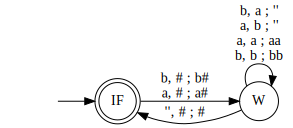

In [14]:
dotObj_pda(eqab_pda, FuseEdges=True)

In [15]:
from AnimatePDA import *

In [16]:
help(AnimatePDA)

Help on class AnimatePDA in module AnimatePDA:

class AnimatePDA(builtins.object)
 |  AnimatePDA(m_desc, FuseEdges=False, max_stack=30, max_width=9.0, accept_color='chartreuse3', reject_color='red', neutral_color='dodgerblue2')
 |  
 |  This is the PDA animation class.
 |  Call it with the PDA to be animated, and also FuseEdges=True/False
 |  to draw the PDA with edges either fused or not.
 |  For producing drawings in Colab, it is important to have these in
 |  every cell that calls animation.
 |  
 |  AnimatePDA(myPDA, FuseEdges='True/False')
 |  followed by
 |  display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))
 |  
 |  Then the animation works in one's own install or Colab.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, m_desc, FuseEdges=False, max_stack=30, max_width=9.0, accept_color='chartreuse3', reject_color='red', neutral_color='dodgerblue2')
 |      Initialize self.  See help(type(self)) for accur

In [17]:
AnimatePDA(eqab_pda, FuseEdges=True, max_stack=10)
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))


In [20]:
explore_pda("aaaaaabbbbbb", eqab_pda)

String aaaaaabbbbbb accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('IF', '', '#')
Reached as follows:
->  ('IF', 'aaaaaabbbbbb', '#')
->  ('W', 'aaaaabbbbbb', 'a#')
->  ('W', 'aaaabbbbbb', 'aa#')
->  ('W', 'aaabbbbbb', 'aaa#')
->  ('W', 'aabbbbbb', 'aaaa#')
->  ('W', 'abbbbbb', 'aaaaa#')
->  ('W', 'bbbbbb', 'aaaaaa#')
->  ('W', 'bbbbb', 'aaaaa#')
->  ('W', 'bbbb', 'aaaa#')
->  ('W', 'bbb', 'aaa#')
->  ('W', 'bb', 'aa#')
->  ('W', 'b', 'a#')
->  ('W', '', '#')
->  ('IF', '', '#') .


In [21]:
f27sip = md2mc('''PDA 
!!---------------------------------------------------------------------------
!! This is a PDA From Sipser's book
!! This matches a's and b's ignoring c's
!! or matches a's and c's, ignoring b's in the middle
!! thus matching either a^m b^m c^n or a^m b^n c^m
!!---------------------------------------------------------------------------

!!---------------------------------------------------------------------------
!! State: in , sin ; spush -> tostates !! comment
!!---------------------------------------------------------------------------
iq1    : '' , ''  ; $     -> q2       !!  start in init state by pushing a $

q2     : a  , ''  ; a     -> q2       !!  stack a's
q2     : '' , ''  ; ''    -> q3,q5    !!  split non-det for a^m b^m c^n (q3)
                                      !!  or a^m b^n c^m (q5)

q3     : b  , a   ; ''    -> q3       !!  match b's against a's
q3     : '' , $   ; ''    -> fq4      !!  hope for acceptance when $ surfaces

fq4    : c  , ''  ; ''    -> fq4      !!  be happy so long as c's come
                                      !!  will choke and reject if anything
                                      !!  other than c's come

q5     : b  , ''  ; ''    -> q5       !!  here, we are going to punt over b's
q5     : '' , ''  ; ''    -> q6       !!  and non-det decide to honor c's matching
                                      !!  against a's

q6     : c  , a   ; ''    -> q6       !!  OK to match so long as c's keep coming
q6     : '' , $   ; ''    -> fq7      !!  when $ surfaces, be ready to accept in
                                      !!  state fq7. However, anything else coming in
                                      !!  now will foil match and cause rejection.
!!---------------------------------------------------------------------------
!! You may use the line below as an empty shell to populate for your purposes
!! Also serves as a syntax reminder for entering PDAs.
''')

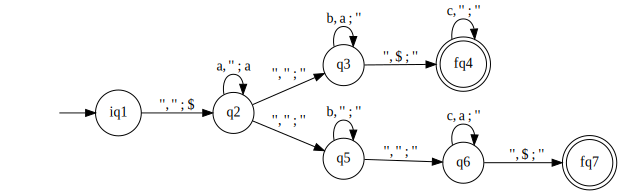

In [22]:
dotObj_pda(f27sip, FuseEdges=True)

In [23]:
explore_pda("aabbcc", f27sip)

String aabbcc accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('fq4', '', '#')
Reached as follows:
->  ('iq1', 'aabbcc', '#')
->  ('q2', 'aabbcc', '$#')
->  ('q2', 'abbcc', 'a$#')
->  ('q2', 'bbcc', 'aa$#')
->  ('q3', 'bbcc', 'aa$#')
->  ('q3', 'bcc', 'a$#')
->  ('q3', 'cc', '$#')
->  ('fq4', 'cc', '#')
->  ('fq4', 'c', '#')
->  ('fq4', '', '#') .
Final state  ('fq7', '', '#')
Reached as follows:
->  ('iq1', 'aabbcc', '#')
->  ('q2', 'aabbcc', '$#')
->  ('q2', 'abbcc', 'a$#')
->  ('q2', 'bbcc', 'aa$#')
->  ('q5', 'bbcc', 'aa$#')
->  ('q5', 'bcc', 'aa$#')
->  ('q5', 'cc', 'aa$#')
->  ('q6', 'cc', 'aa$#')
->  ('q6', 'c', 'a$#')
->  ('q6', '', '$#')
->  ('fq7', '', '#') .


# END
